### Package importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from numpy.random import binomial
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from matplotlib import ticker

pd.set_option('display.max_rows', None)



subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10

### Excel sheets upload

In [2]:
df_invoices = pd.read_excel (r'/Users/martins/Desktop/Nova SBE/Financial Modelling/Case Study 2/Case 2 - Dataset ECB - Al Capone.xlsx', sheet_name='Invoices')
df_stores = pd.read_excel (r'/Users/martins/Desktop/Nova SBE/Financial Modelling/Case Study 2/Case 2 - Dataset ECB - Al Capone.xlsx', sheet_name='Stores')
df_services = pd.read_excel (r'/Users/martins/Desktop/Nova SBE/Financial Modelling/Case Study 2/Case 2 - Dataset ECB - Al Capone.xlsx', sheet_name='Services')
df_clients = pd.read_excel (r'/Users/martins/Desktop/Nova SBE/Financial Modelling/Case Study 2/Case 2 - Dataset ECB - Al Capone.xlsx', sheet_name='Clients')

### Data description 

In [3]:
df_invoices.head()

,invoice_id,date,client_id,store_id,service_id
0,1,2022-09-14,70.0,4.0,6.0
1,2,2022-08-30,12.0,1.0,4.0
2,3,2022-08-30,79.0,1.0,1.0
3,4,2022-08-19,57.0,5.0,2.0
4,5,2022-08-21,66.0,3.0,6.0


In [4]:
df_invoices.tail()

,invoice_id,date,client_id,store_id,service_id
578,579,2022-09-25,NaN,NaN,NaN
579,580,2022-09-25,NaN,NaN,NaN
580,581,2022-09-25,NaN,NaN,NaN
581,582,2022-09-25,NaN,NaN,NaN
582,583,2022-09-25,NaN,NaN,NaN


### Missing Values

In [5]:
df_invoices.isnull().sum()

invoice_id     0
date           0
client_id     30
store_id      26
service_id    34
dtype: int64

In [6]:
df_invoices.isna().sum()/len(df_invoices)*100

invoice_id    0.000000
date          0.000000
client_id     5.145798
store_id      4.459691
service_id    5.831904
dtype: float64

### Sheets Merger

In [7]:
df_merged_clients_invoices = pd.merge(df_invoices, df_clients, on=["client_id"])
df_merged_clients_invoices_stores=pd.merge(df_merged_clients_invoices, df_stores, on=['store_id'])
final_merge=pd.merge(df_merged_clients_invoices, df_services, on=['service_id'])
final_merge

,invoice_id,date,client_id,store_id,service_id,first_name,last_name,name_x,fiscal number,email,name_y,price,minutes
0,1,2022-09-14,70.0,4.0,6.0,lylah,Daly,@lylahDaly\Download,520602865,lylah.daly@gmail.com,Coffee & Tea,0.99,30
1,438,2022-08-29,70.0,1.0,6.0,lylah,Daly,@lylahDaly\Download,520602865,lylah.daly@gmail.com,Coffee & Tea,0.99,30
2,532,2022-08-28,70.0,1.0,6.0,lylah,Daly,@lylahDaly\Download,520602865,lylah.daly@gmail.com,Coffee & Tea,0.99,30
3,247,2022-08-26,12.0,5.0,6.0,ayva,Koch,@ayvaKoch\Download,583727433,ayva.koch@gmail.com,Coffee & Tea,0.99,30
4,30,2022-09-13,57.0,3.0,6.0,kaiser,Powers,@kaiserPowers\Download,250213367,kaiser.powers@gmail.com,Coffee & Tea,0.99,30
5,80,2022-09-03,57.0,1.0,6.0,kaiser,Powers,@kaiserPowers\Download,250213367,kaiser.powers@gmail.com,Coffee & Tea,0.99,30
6,484,2022-08-26,57.0,3.0,6.0,kaiser,Powers,@kaiserPowers\Download,250213367,kaiser.powers@gmail.com,Coffee & Tea,0.99,30
7,5,2022-08-21,66.0,3.0,6.0,lilly-ann,Sierra,@lilly-annSierra\Download,895910806,lilly-ann.sierra@gmail.com,Coffee & Tea,0.99,30
8,110,2022-09-06,66.0,3.0,6.0,lilly-ann,Sierra,@lilly-annSierra\Download,895910806,lilly-ann.sierra@gmail.com,Coffee & Tea,0.99,30
9,67,2022-08-27,4.0,5.0,6.0,ailish,Mcleod,@ailishMcleod\Download,381817201,ailish.mcleod@gmail.com,Coffee & Tea,0.99,30


In [8]:
final_merge.rename(columns = {'fiscal number':'fiscal_number'}, inplace = True)

### Merger description 

In [9]:
final_merge.tail(100)

,invoice_id,date,client_id,store_id,service_id,first_name,last_name,name_x,fiscal_number,email,name_y,price,minutes
446,17,2022-09-14,10.0,4.0,2.0,ashleigh,Deacon,@ashleighDeacon\Download,142547817,ashleigh.deacon@gmail.com,Wash & Dry,4.99,90
447,180,2022-08-20,10.0,3.0,2.0,ashleigh,Deacon,@ashleighDeacon\Download,142547817,ashleigh.deacon@gmail.com,Wash & Dry,4.99,90
448,146,2022-08-29,37.0,1.0,2.0,esme-rose,Olson,@esme-roseOlson\Download,116658466,esme-rose.olson@gmail.com,Wash & Dry,4.99,90
449,50,2022-09-16,74.0,3.0,2.0,maia,Marin,@maiaMarin\Download,632032060,maia.marin@gmail.com,Wash & Dry,4.99,90
450,290,2022-08-29,74.0,2.0,2.0,maia,Marin,@maiaMarin\Download,632032060,maia.marin@gmail.com,Wash & Dry,4.99,90
451,104,2022-09-16,24.0,4.0,2.0,daniaal,Walker,@daniaalWalker\Download,477871560,daniaal.walker@gmail.com,Wash & Dry,4.99,90
452,31,2022-08-20,75.0,4.0,2.0,malika,Esquivel,@malikaEsquivel\Download,902245663,malika.esquivel@gmail.com,Wash & Dry,4.99,90
453,60,2022-08-23,75.0,1.0,2.0,malika,Esquivel,@malikaEsquivel\Download,902245663,malika.esquivel@gmail.com,Wash & Dry,4.99,90
454,293,2022-09-08,75.0,2.0,2.0,malika,Esquivel,@malikaEsquivel\Download,902245663,malika.esquivel@gmail.com,Wash & Dry,4.99,90
455,541,2022-09-12,75.0,3.0,2.0,malika,Esquivel,@malikaEsquivel\Download,902245663,malika.esquivel@gmail.com,Wash & Dry,4.99,90


In [10]:
final_merge.shape

(546, 13)

In [11]:
print(f"Number of features: {final_merge.shape[1]}")
print(f"Number of instances: {final_merge.shape[0]}")

Number of features: 13
Number of instances: 546


In [12]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   invoice_id     546 non-null    int64         
 1   date           546 non-null    datetime64[ns]
 2   client_id      546 non-null    float64       
 3   store_id       546 non-null    float64       
 4   service_id     546 non-null    float64       
 5   first_name     546 non-null    object        
 6   last_name      546 non-null    object        
 7   name_x         546 non-null    object        
 8   fiscal_number  546 non-null    int64         
 9   email          546 non-null    object        
 10  name_y         546 non-null    object        
 11  price          546 non-null    float64       
 12  minutes        546 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 59.7+ KB


In [13]:
final_merge.describe()

,invoice_id,client_id,store_id,service_id,fiscal_number,price,minutes
count,546.000000,546.000000,546.000000,546.000000,5.460000e+02,546.000000,546.000000
mean,273.500000,50.375458,2.959707,3.456044,5.172426e+08,3.446538,52.481685
std,157.760895,28.649160,1.444454,1.705601,2.676911e+08,1.795837,21.544165
min,1.000000,1.000000,1.000000,1.000000,1.166585e+08,0.990000,30.000000
25%,137.250000,24.250000,2.000000,2.000000,2.502134e+08,1.990000,35.000000
50%,273.500000,52.000000,3.000000,3.000000,4.778716e+08,3.780000,50.000000
75%,409.750000,74.000000,4.000000,5.000000,8.094499e+08,4.990000,60.000000
max,546.000000,101.000000,5.000000,6.000000,9.778470e+08,6.250000,90.000000


In [14]:
### Checking for missing values after final_merge

final_merge.isnull().sum()

invoice_id       0
date             0
client_id        0
store_id         0
service_id       0
first_name       0
last_name        0
name_x           0
fiscal_number    0
email            0
name_y           0
price            0
minutes          0
dtype: int64

### Checking fiscal_number quality

In [15]:
### Which lines appear with a duplicated fiscal_number (not necessarly fraud, could be the same client)

final_merge.duplicated(subset='fiscal_number')

0      False
1       True
2       True
3      False
4      False
5       True
6       True
7      False
8       True
9      False
10     False
11     False
12     False
13      True
14     False
15      True
16      True
17     False
18     False
19      True
20      True
21      True
22      True
23      True
24     False
25     False
26      True
27      True
28     False
29      True
30     False
31      True
32     False
33      True
34     False
35     False
36     False
37      True
38     False
39      True
40     False
41      True
42     False
43      True
44      True
45     False
46      True
47      True
48      True
49     False
50     False
51     False
52      True
53      True
54      True
55     False
56     False
57      True
58     False
59      True
60     False
61      True
62     False
63     False
64      True
65      True
66      True
67      True
68     False
69     False
70     False
71      True
72      True
73     False
74      True
75      True
76      True

In [16]:
### Number of lines that have a non-unique fiscal number

fiscal_veracity = list(final_merge.duplicated(subset='fiscal_number'))
count = 0

for boolean in fiscal_veracity:
    if boolean == True:
        count += 1
count

476

In [17]:
### Number of fiscal_number missing from the dataset

duplicated_fiscal_numbers=len(final_merge.first_name.unique())-len(final_merge.fiscal_number.unique())
duplicated_fiscal_numbers

31

### Selecting all client_id with non unique fiscal_number 

In [18]:
fraudulent_df = final_merge.groupby(['fiscal_number']).filter(lambda x: x['client_id'].nunique() > 1)
fraudulent_df

,invoice_id,date,client_id,store_id,service_id,first_name,last_name,name_x,fiscal_number,email,name_y,price,minutes
4,30,2022-09-13,57.0,3.0,6.0,kaiser,Powers,@kaiserPowers\Download,250213367,kaiser.powers@gmail.com,Coffee & Tea,0.99,30
5,80,2022-09-03,57.0,1.0,6.0,kaiser,Powers,@kaiserPowers\Download,250213367,kaiser.powers@gmail.com,Coffee & Tea,0.99,30
6,484,2022-08-26,57.0,3.0,6.0,kaiser,Powers,@kaiserPowers\Download,250213367,kaiser.powers@gmail.com,Coffee & Tea,0.99,30
31,86,2022-08-28,58.0,5.0,6.0,kajol,Wormald,@kajolWormald\Download,250213367,kajol.wormald@gmail.com,Coffee & Tea,0.99,30
32,27,2022-09-08,14.0,3.0,6.0,beau,Barrera,@beauBarrera\Download,812154050,beau.barrera@gmail.com,Coffee & Tea,0.99,30
33,249,2022-09-05,14.0,5.0,6.0,beau,Barrera,@beauBarrera\Download,812154050,beau.barrera@gmail.com,Coffee & Tea,0.99,30
35,121,2022-08-31,45.0,4.0,6.0,hamaad,Corona,@hamaadCorona\Download,130607696,hamaad.corona@gmail.com,Coffee & Tea,0.99,30
37,40,2022-08-19,71.0,4.0,6.0,lynda,Pickett,@lyndaPickett\Download,250213367,lynda.pickett@gmail.com,Coffee & Tea,0.99,30
44,437,2022-08-23,68.0,1.0,6.0,lucca,Rush,@luccaRush\Download,250213367,lucca.rush@gmail.com,Coffee & Tea,0.99,30
47,72,2022-09-02,43.0,5.0,6.0,geraint,Farmer,@geraintFarmer\Download,130607696,geraint.farmer@gmail.com,Coffee & Tea,0.99,30


In [19]:
### Number of non-credible invoices

len(fraudulent_df)

163

In [20]:
### Percentage of non-credible invoices

fraud_volume = len(fraudulent_df)/len(final_merge)*100
print(f'The percentage of Fraudulent invoices is '+ str("{:.0f}".format(fraud_volume))+"%")

The percentage of Fraudulent invoices is 30%


In [21]:
### Percentage of credible invoices

legitimate_volume = 100-(len(fraudulent_df)/len(final_merge)*100)
print(f'The percentage of Fraudulent invoices is '+ str("{:.0f}".format(legitimate_volume))+"%")

The percentage of Fraudulent invoices is 70%


In [22]:
### Total revenue

total_revenue = sum(list(final_merge['price']))
total_revenue

1881.8099999999995

In [23]:
### Fraudulent revenue amount
fraud_revenue_amount = sum(list(fraudulent_df['price']))
fraud_revenue_amount

557.2599999999996

In [24]:
### Legitimate revenue amount
legitimate_revenue = total_revenue - fraud_revenue_amount
legitimate_revenue

1324.5499999999997

In [25]:
### Fraudulent revenue percentage

fraud_revenue_percentage = fraud_revenue_amount/total_revenue*100
print(f'The percentage of Fraudulent revenue is '+ str("{:.0f}".format(fraud_revenue_percentage))+"%")

The percentage of Fraudulent revenue is 30%


In [26]:
### Legit revenue percentage

legitimate_revenue_percentage = legitimate_revenue/total_revenue*100
print(f'The percentage of Fraudulent revenue is '+ str("{:.0f}".format(legitimate_revenue_percentage))+"%")

The percentage of Fraudulent revenue is 70%


In [27]:
fraudulent_slice = fraudulent_df.loc[:,'invoice_id':'client_id']
fraudulent_slice

,invoice_id,date,client_id
4,30,2022-09-13,57.0
5,80,2022-09-03,57.0
6,484,2022-08-26,57.0
31,86,2022-08-28,58.0
32,27,2022-09-08,14.0
33,249,2022-09-05,14.0
35,121,2022-08-31,45.0
37,40,2022-08-19,71.0
44,437,2022-08-23,68.0
47,72,2022-09-02,43.0


### Graphing (Revenue and Invoice) 

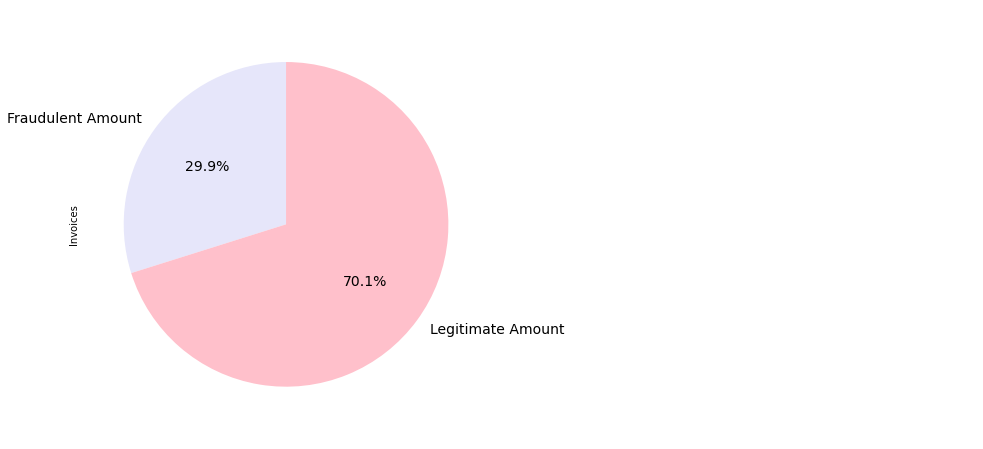

In [52]:
# sample data
raw_data1 = {'invoice_type': ['Fraudulent Amount', 'Legitimate Amount'],
        'fraud': [fraud_volume,legitimate_volume],
        
        }
df1 = pd.DataFrame(raw_data1, columns = ['invoice_type','fraud'])
df1['Invoices'] = df1['fraud']

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df1.plot(kind='pie', y = 'Invoices', ax=ax1, autopct='%1.1f%%',  colors = ['lavender', 'pink'],

 startangle=90, shadow=False, labels=df1['invoice_type'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
plt.show()

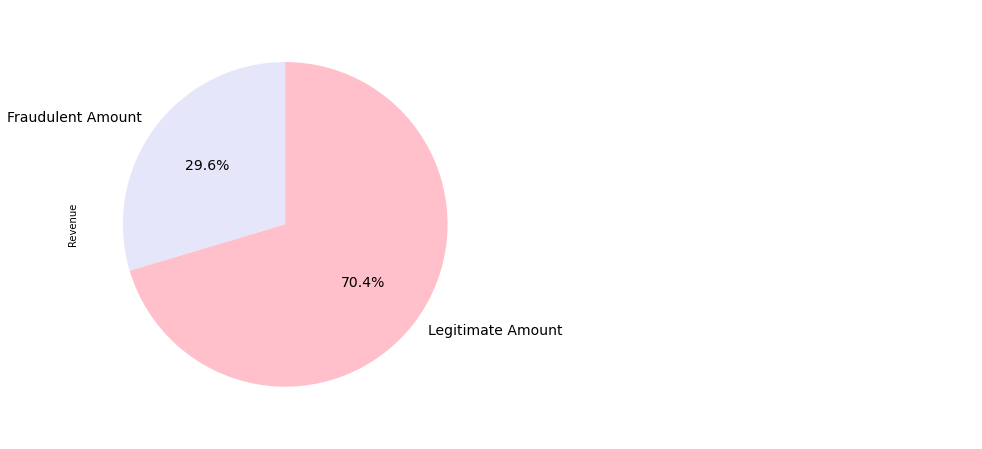

In [53]:
# sample data
raw_data2 = {'invoice_type': ['Fraudulent Amount', 'Legitimate Amount'],
        'fraud': [fraud_revenue_percentage,legitimate_revenue_percentage],
        
        }
df2 = pd.DataFrame(raw_data2, columns = ['invoice_type','fraud'])
df2['Revenue'] = df2['fraud']

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df2.plot(kind='pie', y = 'Revenue', ax=ax1, autopct='%1.1f%%', colors = ['lavender', 'pink'],
 startangle=90, shadow=False, labels=df2['invoice_type'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
plt.show()

In [30]:
df1

,invoice_type,fraud,Invoices
0,Fraudulent Amount,29.85348,29.85348
1,Legitimate Amount,70.14652,70.14652


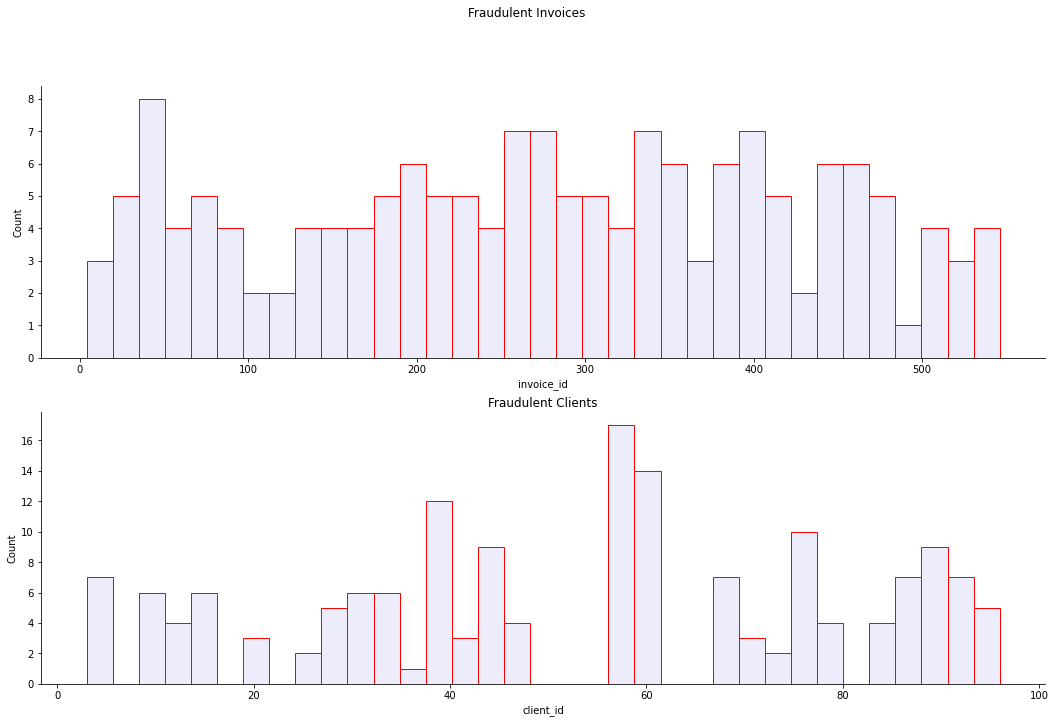

In [86]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Identify all numeric variables in the dataset
numerical = ['invoice_id','client_id']

# Draw
fig, ax = plt.subplots(2, figsize=(18,11))
for var, subplot in zip(fraudulent_slice[numerical], ax.flatten()):
    g = sns.histplot(data=fraudulent_slice, color = "lavender", ec="red",
                bins=35,
                 x=var,
                 ax=subplot,
                 kde=False)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Fraudulent Info", fontsize=subPlots_Title_fontSize);
plt.title("Fraudulent Clients")
color=['black', 'red', 'black', 'red', 'black']

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Fraudulent Invoices", fontsize=subPlots_Title_fontSize);
